In [249]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [250]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [251]:
data = pd.read_csv('/content/drive/MyDrive/LDS6_K278_ONLINE_Dương Hoàng Tiến/DeThi_CuoiKy_MachineLearning_Python_K278/Data/market_basket.csv')
data.head()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      131706 non-null  int64  
 1   Date            131706 non-null  object 
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-null  int64  
 4   SKU_Category    131706 non-null  object 
 5   SKU             131706 non-null  object 
 6   Quantity        131706 non-null  float64
 7   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 8.0+ MB


In [253]:
data.shape

(131706, 8)

In [254]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [255]:
data.sort_values(by='Quantity', ascending=True)

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
94079,13/10/2016,11158,49674,XG4,RC425,0.01,0.06
95734,17/10/2016,2186,50405,XG4,RC425,0.05,0.26
90817,06/10/2016,17922,48270,ZJG,CO8TB,0.10,7.80
105867,11/11/2016,21242,54906,ARZ,9DJOL,0.10,3.65
104974,09/11/2016,17294,54516,ARZ,9DJOL,0.10,3.65
...,...,...,...,...,...,...,...
113907,30/11/2016,11634,58440,XG4,MAJO7,200.00,15.00
118682,10/12/2016,16147,60457,H8O,CKDW0,200.00,8.18
121888,16/12/2016,18365,61798,H8O,CKDW0,200.00,8.18
112719,27/11/2016,1694,57951,H8O,CKDW0,300.00,12.27


In [256]:
data['Customer_ID'].unique().shape

(22625,)

In [257]:
data['Transaction_ID'].unique().shape

(64682,)

Có tất cả 22652 khách hàng và 64682 giao dịch

In [258]:
count_transactions =  data.groupby(['SKU', 'SKU_Category'])['Transaction_ID'].count().reset_index()
count_transactions = count_transactions.sort_values(by='Transaction_ID')

In [259]:
count_transactions.head()

,SKU,SKU_Category,Transaction_ID
5241,ZZX6K,3MC,1
2894,JPYDA,SIM,1
2897,JQV7D,ZYU,1
2898,JR1RQ,0KX,1
897,60LOD,29A,1


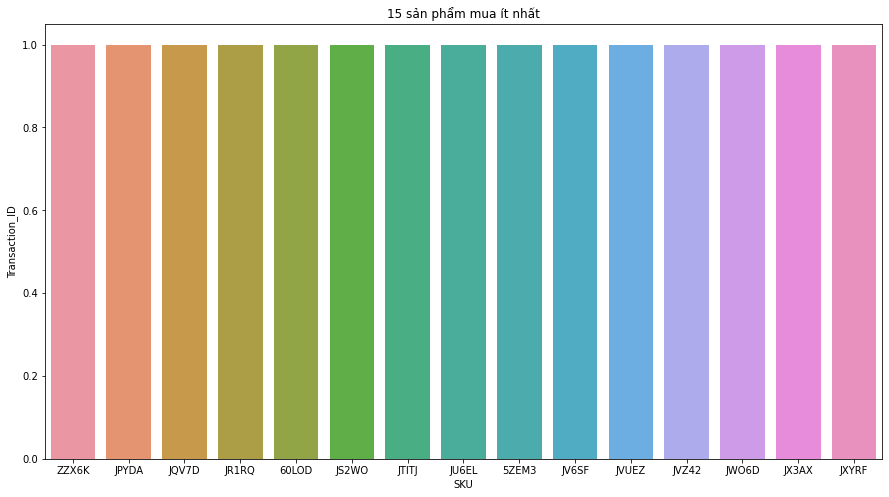

In [260]:
plt.figure(figsize=(15,8))
sns.barplot(data=count_transactions[:15], x='SKU', y='Transaction_ID')
plt.title('15 sản phẩm mua ít nhất')
plt.show()

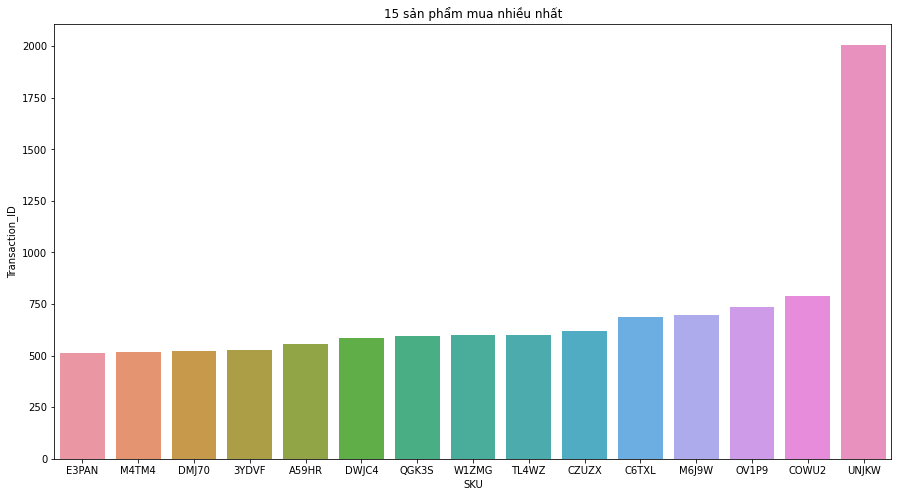

In [261]:
plt.figure(figsize=(15,8))
sns.barplot(data=count_transactions[-15:], x='SKU', y='Transaction_ID')
plt.title('15 sản phẩm mua nhiều nhất')
plt.show()

In [262]:
# các sản phẩm chỉ có một lượt mua
less_products = count_transactions[count_transactions['Transaction_ID']==1]['SKU'].to_list()
less_products[0:20]

['ZZX6K',
 'JPYDA',
 'JQV7D',
 'JR1RQ',
 '60LOD',
 'JS2WO',
 'JTITJ',
 'JU6EL',
 '5ZEM3',
 'JV6SF',
 'JVUEZ',
 'JVZ42',
 'JWO6D',
 'JX3AX',
 'JXYRF',
 'JXZPR',
 'JOJ2A',
 'K1LR5',
 'JNIRX',
 '62OG1']

In [263]:
data = data.set_index('SKU')
data = data.drop(index=less_products, axis=0)

In [264]:
data.shape

(130630, 6)

In [265]:
data = data.reset_index()

In [266]:
data['Date'] = data['Date'].astype('datetime64')

In [267]:
Transactions = data.groupby('Transaction_ID')['SKU'].apply(lambda x: ' '.join(x))

In [268]:
Transactions.shape

(64217,)

In [269]:
Transactions.duplicated().sum()

32022

In [270]:
Transactions = Transactions.drop_duplicates()

In [271]:
Transactions.shape

(32195,)

In [272]:
Transactions.reset_index()

,Transaction_ID,SKU
0,1,0EM7L
1,2,68BRQ
2,3,CZUZX
3,4,549KK
4,5,K8EHH
...,...,...
32190,64674,F7FQ5 GZWZR
32191,64675,Y6DHV 7GQRJ E2REV
32192,64676,7QUXS C7BXJ
32193,64677,UNJKW 0V9JD


In [273]:
Transactions = Transactions.to_list()

In [274]:
Transactions_new = []
for transaction in Transactions:
  lst = transaction.split(' ')
  if len(lst) > 2:
    Transactions_new.append(lst)

In [275]:
Transactions_new[0:30]

[['4PLF3', 'W9RKF', '520UE'],
 ['YIM6C', '8D73U', 'EMJ1S', 'F90L2'],
 ['T5V5W', 'RBNO8', 'RVZ6I'],
 ['RZW8B', '4TTS2', 'AEKO3'],
 ['CERTN', 'ZDSYK', 'F64H7'],
 ['JJ9FT', '23Y9E', '25CJ5'],
 ['AK33R', 'F64H7', 'RH5J5'],
 ['7YTSF', '9XQSN', 'SANGZ', 'BKQSZ'],
 ['4EKR9', '9FTYM', 'ZP7RI', 'MKV69', 'Z0UBN'],
 ['14V9T', 'COWU2', 'M3SY1', 'UCK6F'],
 ['VKMQ4', 'ZRKHN', 'UNJKW'],
 ['FV49E', '1XG54', '0TLU5'],
 ['4BPPU',
  'LPLTZ',
  'TL4WZ',
  'PV9XZ',
  'MM77N',
  'U4XSE',
  'NOKHJ',
  '9F8O1',
  'NZQS5',
  'GYQNP'],
 ['7QUXS', 'H87RV', 'MYQAP'],
 ['Y1M2E', 'WHV3G', 'WALAE'],
 ['DLFQW', 'F90L2', 'LKDTY'],
 ['81AIS', 'ZDSYK', 'DUV2Y'],
 ['IPVE6', 'LGDUB', '1MR3E', '1LGSE', '51OBI', 'LQ555', 'RBNO8', '89ULV'],
 ['68BRQ', 'NZY1K', 'WK41K', 'VWUC7'],
 ['OV1P9', '3220G', 'OXMKW', 'EEQQ0'],
 ['3220G', 'L9X5Q', 'BK9BM'],
 ['J93NR', 'UNJKW', 'EMJ1S'],
 ['N0RAF', 'CC028', 'PQ7MM'],
 ['NPV8G', 'Z2AX9', 'M93I3', 'DUWYY'],
 ['M4TM4', 'MYO3P', '0BXVJ', 'XQBTK'],
 ['Q4ZAD', 'OV1P9', '15PXV'],
 ['7YOPV', 'U

In [276]:
len(Transactions_new)

14451

In [277]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [278]:
te = TransactionEncoder()

In [279]:
te_ary = te.fit_transform(Transactions_new)

In [280]:
df = pd.DataFrame(data=te_ary, columns=te.columns_)

In [281]:
df.head(20)

,00GVC,00OK1,0121I,01IEO,01IQT,01L05,01V7M,03C6L,03CPI,03K3G,...,ZUV4D,ZVGX9,ZVQ7Q,ZVTO4,ZWFSY,ZWWB5,ZY9N9,ZYF2U,ZZDW7,ZZM1A
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [305]:
frequent_itemsets = apriori(df, min_support=0.002 ,use_colnames=True).sort_values(by='support', ascending=False)

In [306]:
frequent_itemsets

,support,itemsets
449,0.057920,(UNJKW)
192,0.041520,(C6TXL)
434,0.033562,(TL4WZ)
396,0.033423,(QGK3S)
219,0.032316,(DWJC4)
...,...,...
486,0.002007,(X2BTR)
191,0.002007,(C4Y40)
190,0.002007,(C07LW)
428,0.002007,(TD3DD)


In [307]:
from mlxtend.frequent_patterns import association_rules

In [308]:
rule_1 = association_rules(df=frequent_itemsets, metric='confidence', min_threshold=0.002)

In [309]:
rule_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(TL4WZ),(C6TXL),0.033562,0.041520,0.003944,0.117526,2.830608,0.002551,1.086128
1,(C6TXL),(TL4WZ),0.041520,0.033562,0.003944,0.095000,2.830608,0.002551,1.067888
2,(COWU2),(UNJKW),0.018684,0.057920,0.003806,0.203704,3.516992,0.002724,1.183077
3,(UNJKW),(COWU2),0.057920,0.018684,0.003806,0.065711,3.516992,0.002724,1.050335
4,(DWJC4),(TL4WZ),0.032316,0.033562,0.003737,0.115632,3.445348,0.002652,1.092801
...,...,...,...,...,...,...,...,...,...
63,(DWJC4),(W14J3),0.032316,0.017784,0.002076,0.064240,3.612178,0.001501,1.049645
64,(C6TXL),(X05XH),0.041520,0.018753,0.002007,0.048333,2.577362,0.001228,1.031083
65,(X05XH),(C6TXL),0.018753,0.041520,0.002007,0.107011,2.577362,0.001228,1.073340
66,(W14J3),(1IX2L),0.017784,0.010588,0.002007,0.112840,10.657893,0.001818,1.115259


In [310]:
rule_2 = association_rules(df=frequent_itemsets, metric='lift', min_threshold=1)

In [311]:
rule_2.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
38,(5O2CO),(3QNEE),0.002976,0.002768,0.002353,0.790698,285.659302,0.002345,4.764553
39,(3QNEE),(5O2CO),0.002768,0.002976,0.002353,0.850000,285.659302,0.002345,6.646830
66,(W14J3),(1IX2L),0.017784,0.010588,0.002007,0.112840,10.657893,0.001818,1.115259
67,(1IX2L),(W14J3),0.010588,0.017784,0.002007,0.189542,10.657893,0.001818,1.211928
15,(9Y7M0),(LJ26I),0.016746,0.017023,0.002976,0.177686,10.437966,0.002691,1.195379
...,...,...,...,...,...,...,...,...,...
28,(OV1P9),(UNJKW),0.019860,0.057920,0.002699,0.135889,2.346147,0.001548,1.090230
55,(W1ZMG),(C6TXL),0.028303,0.041520,0.002076,0.073350,1.766626,0.000901,1.034350
54,(C6TXL),(W1ZMG),0.041520,0.028303,0.002076,0.050000,1.766626,0.000901,1.022839
40,(DWJC4),(C6TXL),0.032316,0.041520,0.002353,0.072805,1.753512,0.001011,1.033742


In [289]:
from collections import defaultdict

In [290]:
# source code from: http://codegist.net/snippet/python/eclatpy_evertheylen_python
def tidlists(transactions):
    tl = defaultdict(set)
    for tid, t in enumerate(transactions):
        for item in t:
            tl[item].add(tid)
    return list(tl.items())


class IntersectAll:
    def __and__(self, other):
        return other


IntersectAll = IntersectAll()


def eclat(items, minsup=0, minlen=1):
    frequent_itemsets = {(): IntersectAll}

    def recurse(items, prefix):
        while len(items) > 0:
            item, item_tidlist = items.pop()
            l = prefix + (item,)  # l is the (ordered) tuple of items we are looking for
            new_tidlist = frequent_itemsets[prefix] & item_tidlist
            if len(new_tidlist) >= minsup:  # add frequent_itemsets to the new frequent_itemsets
                frequent_itemsets[l] = new_tidlist

            # define the new l-conditional database
            new_items = []
            for new_item, _item_tidlist in items:
                new_item_tidlist = _item_tidlist & item_tidlist
                if len(new_item_tidlist) >= minsup:
                    new_items.append((new_item, new_item_tidlist))

            # recurse, with l as prefix
            recurse(new_items, l)

    recurse(items.copy(), ())
    return {k: len(v) for k, v in frequent_itemsets.items() if len(k) >= minlen}

In [291]:
items = tidlists(Transactions_new)

In [292]:
items[0:4]

[('4PLF3',
  {0,
   1397,
   1461,
   2051,
   2756,
   2875,
   2876,
   3010,
   3508,
   3802,
   4335,
   4691,
   4928,
   5012,
   5660,
   5725,
   6500,
   7351,
   7721,
   7768,
   7999,
   10504,
   10975,
   12046,
   13710}),
 ('W9RKF', {0, 4412}),
 ('520UE',
  {0,
   551,
   636,
   1038,
   1159,
   1427,
   1565,
   2146,
   2505,
   3036,
   3079,
   3355,
   3691,
   3862,
   3993,
   4099,
   4612,
   4645,
   4700,
   4811,
   4875,
   5202,
   5296,
   5545,
   5591,
   6426,
   6511,
   6939,
   6985,
   7503,
   7805,
   8060,
   8227,
   8434,
   8495,
   8605,
   8829,
   8875,
   9382,
   9397,
   10012,
   10034,
   10145,
   10239,
   10473,
   10530,
   10723,
   10882,
   11227,
   11550,
   12103,
   12239,
   12268,
   12308,
   12625,
   12887,
   12903,
   12913,
   13190,
   13777,
   13790,
   14012,
   14019,
   14196,
   14233,
   14296}),
 ('YIM6C',
  {1,
   96,
   633,
   926,
   2754,
   3215,
   3263,
   3616,
   3851,
   3871,
   4172,
   4670

In [293]:
result = eclat(items, minsup=40, minlen=2)

In [294]:
result

{('3YDVF', 'DWJC4'): 54,
 ('B87MU', 'C6TXL'): 44,
 ('4FT32', 'QGK3S'): 41,
 ('C6TXL', 'QGK3S'): 53,
 ('C6TXL', '9Y7M0'): 42,
 ('C6TXL', 'SJ0ZD'): 41,
 ('C6TXL', 'LJ26I'): 51,
 ('C6TXL', 'TL4WZ'): 57,
 ('QGK3S', 'DWJC4'): 41,
 ('9Y7M0', 'LJ26I'): 43,
 ('DWJC4', 'TL4WZ'): 54,
 ('UNJKW', 'COWU2'): 55}

In [295]:
Keymax = max(result, key = lambda x: result[x])
print(Keymax)

('C6TXL', 'TL4WZ')


In [296]:
Keymin = min(result, key = lambda x: result[x])
print(Keymin)

('4FT32', 'QGK3S')


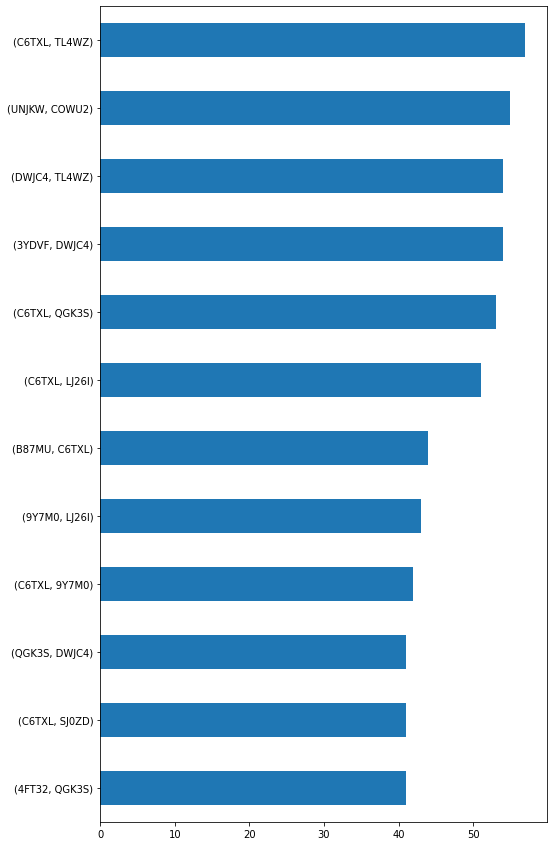

In [297]:
plt.figure(figsize=(8,15))
pd.Series(result).sort_values().plot(kind='barh')